In [51]:
import pandas as pd
import matplotlib.pyplot as plt

## Pivot

In [2]:
# Read and show the dataset
df_race_census = pd.read_csv("US_county_census_est_race_eth_2010_2019.csv")

In [3]:
df_race_census_no_duplicates = df_race_census.drop_duplicates(subset=["year"])

In [4]:
# Reshape the dataframe with .pivot()
# Find a way to get rid of ---ValueError: Index contains duplicate entries, cannot reshape---
# Table is not showing every state ----FIX-----
df_race_census_no_duplicates.pivot(index="year", columns="state", values="asian_pop")

state,Alabama
year,
2010,484
2011,514
2012,552
2013,561
2014,573
2015,596
2016,646
2017,679
2018,659


### Pivot_table()

In [5]:
import pandas as pd

In [6]:
df_sales = pd.read_excel("SuperstoreSalesTraining.xlsx")
pd.set_option('display.max_columns', None)
df_sales

,Row,Order Priority,Order Date,Order,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,Product Base Margin,Department,Container,Category,Item,Customer Segment,Customer_ID,Customer Name,Region,State,Country / Region,City,Postal Code,Ship Date,Ship Mode,SubRegion
0,1,High,01/01/2010,28774,10%,6.0,32,172.80,106.36,5.0,68.00%,Office Supplies,Small Box,Storage & Organization,False,Small Business,1656,Joy Corbett,AsiaPac,Central,Fiji,Suva,NaN,02/01/2010,Regular Air,NaN
1,2,Not Specified,01/01/2010,88028,8%,96.0,2,176.64,45.64,35.0,50.00%,Office Supplies,Large Box,Storage & Organization,Safco Industrial Wire Shelving,Home Office,2211,Anita Hahn,North America,Maryland,United States of America,Bowie,20715.0,03/01/2010,Express Air,East ...
2,3,Critical,02/01/2010,9285,6%,41.0,3,115.62,33.90,3.0,36.00%,Office Supplies,Small Box,Binders and Binder Accessories,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Consumer,949,Ernest Oh,North America,California,United States of America,Los Angeles,90049.0,04/01/2010,Regular Air,West ...
3,4,Low,02/01/2010,37537,0%,292.0,4,1168.00,605.08,49.0,56.00%,Furniture,Jumbo Drum,Chairs & Chairmats,False,Corporate,68,Scott Bunn,North America,New York,United States of America,New York City,10177.0,02/01/2010,Delivery Truck,East ...
4,5,Low,02/01/2010,37537,7%,101.0,43,4038.99,2647.66,45.0,69.00%,Furniture,Jumbo Drum,Chairs & Chairmats,False,Corporate,68,Scott Bunn,North America,New York,United States of America,New York City,10177.0,04/01/2010,Delivery Truck,East ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,16794,Not Specified,30/12/2013,89840,10%,13.0,18,210.60,109.66,5.0,59.00%,Office Supplies,Small Box,Storage & Organization,Tenex Personal Project File with Scoop Front D...,Corporate,3265,Glenn Morgan,North America,California,United States of America,Fairfield,94533.0,30/12/2013,Express Air,West ...
16794,16795,Not Specified,31/12/2013,46597,6%,13.0,20,244.40,83.40,5.0,40.00%,Office Supplies,Small Box,Binders and Binder Accessories,GBC Binding covers,Consumer,2275,Bradley Gordon,AsiaPac,Jakarta,Indonesia,Jakarta,NaN,02/01/2014,Regular Air,NaN
16795,16796,Medium,31/12/2013,90144,3%,163.0,20,3162.20,1153.60,20.0,39.00%,Office Supplies,Small Box,Envelopes,Multimedia Mailers,Small Business,1090,Seth Davies,North America,Illinois,United States of America,Saint Charles,60174.0,02/01/2014,Regular Air,Central ...
16796,16797,Not Specified,31/12/2013,91506,6%,13.0,5,61.10,17.10,5.0,40.00%,Office Supplies,Small Box,Binders and Binder Accessories,GBC Binding covers,Consumer,2277,Allison Peacock,North America,New York,United States of America,North Tonawanda,14120.0,02/01/2014,Regular Air,East ...


In [8]:
# Make a pivot table and add an aggragate function
df_sales.pivot_table(index="Region", aggfunc="sum")

,Customer_ID,Order,Order Quantity,Postal Code,Profit,Row,Sales,Shipping Cost,Unit Price
Region,,,,,,,,,
AsiaPac,6586010,114901531,158028,283961.0,5370927.26,32565051,10802585.56,47980.0,358071.0
EMEA,3241185,55919386,78882,18696354.0,2850892.32,15734280,5543252.39,25117.0,164579.0
Latam,3160665,48372062,70494,0.0,2383306.89,13645997,4896470.15,21331.0,138740.0
North America,16480247,777510929,133037,494359081.0,4213164.99,79149473,8827273.87,121544.0,839178.0


In [9]:
# Make a pivot table, add an aggragate function and select some columns
df_sales.pivot_table(index="Region", values=["Order Quantity", "Sales"], aggfunc="sum")

,Order Quantity,Sales
Region,,
AsiaPac,158028,10802585.56
EMEA,78882,5543252.39
Latam,70494,4896470.15
North America,133037,8827273.87


In [10]:
# Make a pivot table that showcases the Total sales from each categories per Region. 
df_sales.pivot_table(index="Region", columns="Category", values=["Sales"], aggfunc="sum")

Sales                                            \
Category      Appliances Binders and Binder Accessories  Bookcases   
Region                                                               
AsiaPac        573057.27                      654308.88  576166.04   
EMEA           254662.15                      342786.74  206262.13   
Latam          190941.82                      433209.77  327692.64   
North America  439911.62                      624116.88  486842.01   

                                                                       \
Category      Chairs & Chairmats Computer Peripherals Copiers and Fax   
Region                                                                  
AsiaPac               1186949.84            596661.92        722735.0   
EMEA                   593617.20            229379.47        360828.5   
Latam                  436755.58            246408.27        500134.0   
North America         1137075.08            485273.45        663449.5   

                                                                       \
Category       Envelopes    Labels Office Furnishings Office Machines   
Region                                                                  
AsiaPac        100527.71  31105.32          420735.46      1677165.18   
EMEA            58914.56   9030.25          298246.08       783829.26   
Latam           67352.78   8790.21          231465.90       587974.85   
North America  143072.51  23843.87          435077.39      1273556.24   

                                                           \
Category           Paper Pens & Art Supplies Rubber Bands   
Region                                                      
AsiaPac        294879.83           113153.09     12183.46   
EMEA           145371.42            73916.61      4982.68   
Latam          152198.17            36345.40      5471.19   
North America  242289.07            99564.97      8264.14   

                                                                    \
Category      Scissors, Rulers and Trimmers Storage & Organization   
Region                                                               
AsiaPac                            63473.91              772193.18   
EMEA                               13876.32              444325.12   
Latam                              56330.65              362523.36   
North America                      38252.35              616593.55   

                                                        
Category           Tables Telephones and Communication  
Region                                                  
AsiaPac        1367835.20                   1639454.27  
EMEA            997353.02                    725870.88  
Latam           551235.97                    701639.59  
North America   784506.38                   1325584.86

### Making a Pivot Table

In [11]:
# Reading the csv file
df_race_pop_raw = pd.read_csv("US_county_census_est_race_eth_2010_2019.csv")

In [12]:
# First look at the dataset
df_race_pop_raw

,FIPS,STFIPS,COFIPS,state_abbrev,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,AL,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,AL,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,AL,Alabama,Autauga,2012,54954,43315,9949,552,275,44,819,53639,1315
3,1001,1,1,AL,Alabama,Autauga,2013,54727,42943,9984,561,279,46,914,53363,1364
4,1001,1,1,AL,Alabama,Autauga,2014,54893,42945,10103,573,279,50,943,53461,1432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31405,56045,56,45,WY,Wyoming,Weston,2015,7208,6835,39,81,107,2,144,6923,285
31406,56045,56,45,WY,Wyoming,Weston,2016,7220,6826,38,88,108,2,158,6924,296
31407,56045,56,45,WY,Wyoming,Weston,2017,6968,6558,44,97,114,2,153,6681,287
31408,56045,56,45,WY,Wyoming,Weston,2018,6924,6474,47,109,125,2,167,6651,273


####  .pivot(): returns reshaped dataframe organized by given index/column values("pivot without aggregation")

In [13]:
# Dropping null values
# dropna() method
df_race_pop_raw.dropna(inplace=True)

In [14]:
# Making a pivot table
df_hisp_pop_pivot_table = df_race_pop_raw.pivot_table(index="year", columns="state", values="hisp_pop")

In [15]:
# Selecting some States
df_hisp_pop = df_hisp_pop_pivot_table[['Hawaii', 'Georgia', 'Florida', 'Alabama', 'California', 'Michigan', 'New York', 'Vermont']]

In [16]:
# Showing pivot table
df_hisp_pop

state,Hawaii,Georgia,Florida,Alabama,California,Michigan,New York,Vermont
year,,,,,,,,
2010,24168.4,5369.113208,63041.880597,2770.179104,241615.844828,5257.325301,55111.645161,657.714286
2011,25491.0,5486.610063,65318.358209,2832.731343,246137.810345,5381.951807,56389.241935,706.428571
2012,26538.2,5574.138365,67254.761194,2845.597015,249419.310345,5520.915663,57302.596774,726.714286
2013,27574.6,5645.371069,69416.940299,2882.552239,252668.982759,5633.614458,58092.500000,760.857143
2014,28359.2,5752.553459,71696.402985,2920.507463,255964.017241,5743.542169,58722.645161,777.357143
2015,29063.0,5905.610063,74340.850746,2980.358209,259148.741379,5845.445783,59314.516129,800.071429
2016,29718.4,6091.075472,77310.358209,3065.373134,262167.741379,5987.084337,59800.967742,830.428571
2017,29986.0,6255.163522,80127.761194,3140.447761,264729.913793,6113.915663,60082.564516,866.642857
2018,30178.2,6430.000000,82654.582090,3241.656716,266773.431034,6246.710843,60379.693548,893.142857


###  LINE PLOT

<AxesSubplot:xlabel='Year', ylabel='Hispanic population'>

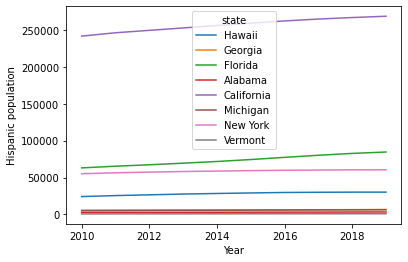

In [17]:
# Display Line Plot with kind= and edit x,y labels
df_hisp_pop.plot(kind='line', xlabel='Year', ylabel='Hispanic population')

<AxesSubplot:title={'center':'Hispanic Population/State (2010-2019)'}, xlabel='year', ylabel='Hispanic'>

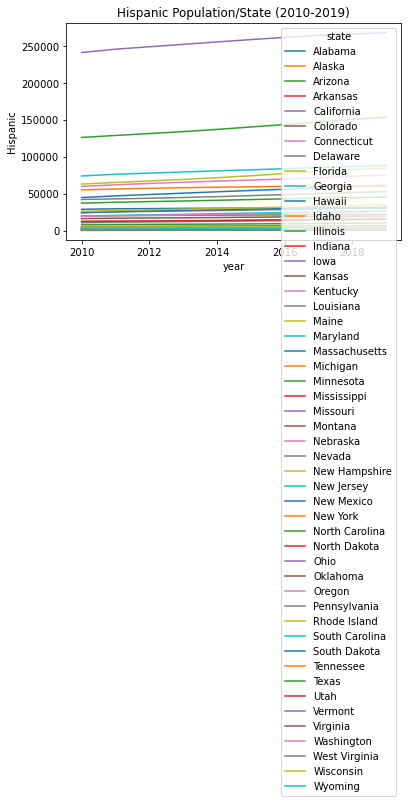

In [18]:
# Add a Title 
df_hisp_pop_pivot_table.plot(kind='line', ylabel='Hispanic', title='Hispanic Population/State (2010-2019)')

<AxesSubplot:title={'center':'Hispanic Population/State (2010-2019)'}, xlabel='year', ylabel='Hispanic'>

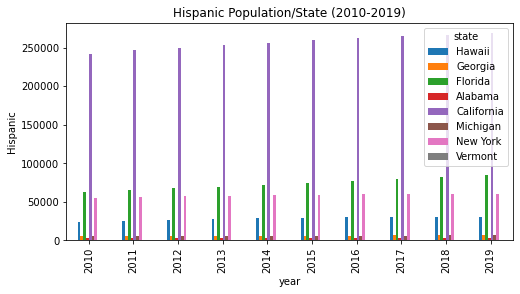

In [19]:
# Change figure size with figsize=(x, y)
df_hisp_pop.plot(kind='bar', ylabel='Hispanic', title='Hispanic Population/State (2010-2019)', figsize=(8, 4))

<AxesSubplot:ylabel='year'>

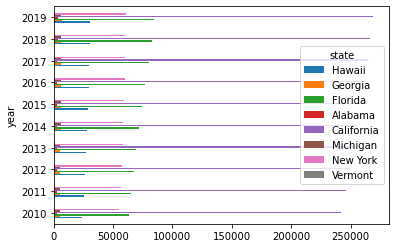

In [20]:
df_hisp_pop.plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

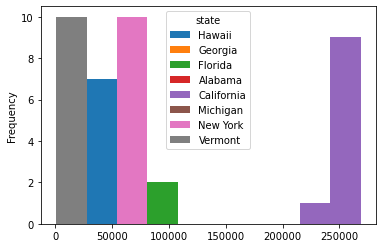

In [21]:
df_hisp_pop.plot(kind='hist')

<AxesSubplot:>

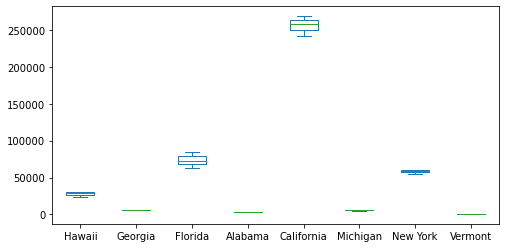

In [24]:
df_hisp_pop.plot(kind='box', figsize=(8, 4))

<AxesSubplot:ylabel='Density'>

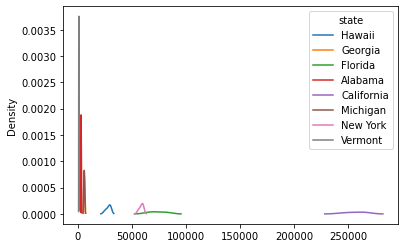

In [25]:
df_hisp_pop.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

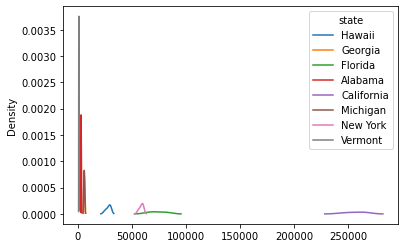

In [26]:
df_hisp_pop.plot(kind='density')

<AxesSubplot:xlabel='year'>

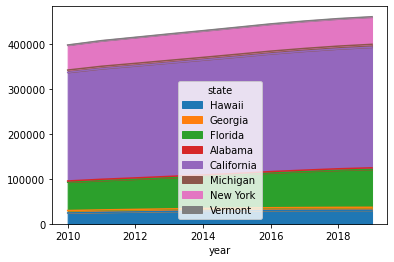

In [27]:
df_hisp_pop.plot(kind='area')

### Single barplot

In [28]:
# Selecting only one year (2018)
df_hisp_pop_2018 = df_hisp_pop[df_hisp_pop.index.isin([2018])]

In [29]:
# Showing new dataframe
df_hisp_pop_2018

state,Hawaii,Georgia,Florida,Alabama,California,Michigan,New York,Vermont
year,,,,,,,,
2018,30178.2,6430.0,82654.58209,3241.656716,266773.431034,6246.710843,60379.693548,893.142857


In [30]:
df_hisp_pop_2018 = df_hisp_pop_2018.T

<AxesSubplot:title={'center':'Hispanic Population/state in 2018'}, xlabel='Year', ylabel='Population'>

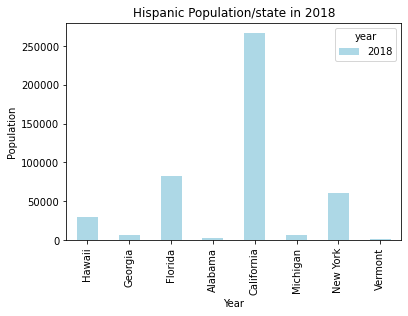

In [31]:
df_hisp_pop_2018.plot(kind='bar', color='lightBlue', xlabel='Year', ylabel='Population', title='Hispanic Population/state in 2018')

### Multiple barplots

<AxesSubplot:xlabel='year'>

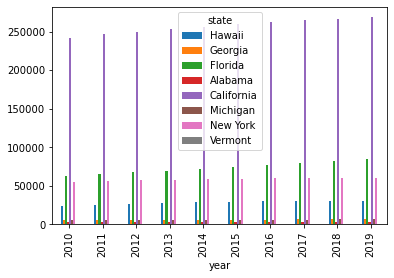

In [32]:
# Making the barplot
df_hisp_pop.plot(kind='bar')

### Barplot grouped by "n" variables

In [33]:
# Selecting a few years
df_hisp_pop_5years = df_hisp_pop[df_hisp_pop.index.isin([2014, 2015, 2016, 2017, 2018])]

<AxesSubplot:xlabel='year'>

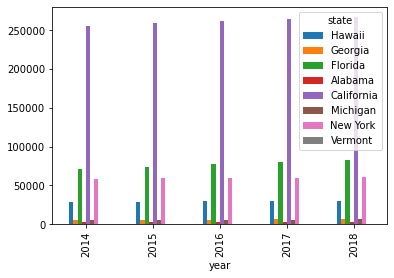

In [34]:
# Making a grouped barplot
df_hisp_pop_5years.plot(kind='bar')

### PieChart

In [58]:
df_hisp_pop_2018


year,2018
state,
Hawaii,30178.200000
Georgia,6430.000000
Florida,82654.582090
Alabama,3241.656716
California,266773.431034
Michigan,6246.710843
New York,60379.693548
Vermont,893.142857


In [59]:
# Changing column name
df_hisp_pop_2018.rename(columns={2018:'2018'}, inplace=True)

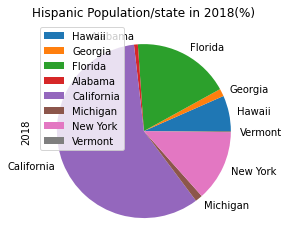

In [60]:
# Making the plot
df_hisp_pop_2018.plot(kind='pie', y='2018', title='Hispanic Population/state in 2018(%)')
# Save plot
plt.savefig('hisp_pop_plot.png')
# Shot plot
plt.show()

### Save Plot and Export Pivot Table

saving

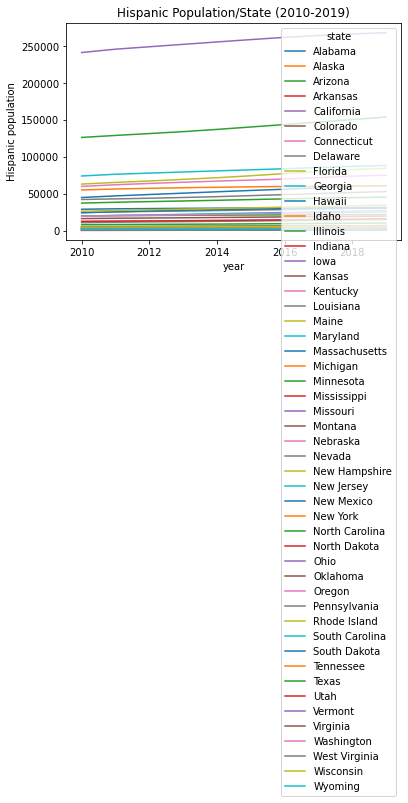

In [62]:
# Add a Title 
df_hisp_pop_pivot_table.plot(kind='line', ylabel='Hispanic population', title='Hispanic Population/State (2010-2019)')

# Save plot
plt.savefig('hisp_pop_plot.png')
# Shot plot
plt.show()

Exporting

In [63]:
# This will resut into an error if file already exist
df_hisp_pop_pivot_table.to_excel('pivot_table.xlsx')